<a href="https://colab.research.google.com/github/iamsimran/OptimumClusters/blob/master/OptimumClusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding optimum number of clusters 

In [49]:
#importing necessary packages
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Reading and preparing data

In [5]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#checking unique classes of flower in the dataset
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [48]:
#extracting required features for training the clusters
iris_feat = iris_df.iloc[:,1:-1].values

### Initiating Kmeans first to calculate withing cluster sum of squares to plot elbow method.

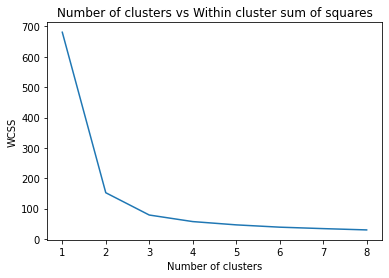

In [53]:
#an empty list to store intertia after each clustering converges
inert = []

#looping from cluster 1 to 8 in order to find the optimum number of clusters
for i in range(1,9):
  c_model = KMeans(n_clusters=i,random_state=0)
  c_model.fit(iris_feat)
  inert.append(c_model.inertia_)
  
#plotting the line graph with intertia on y axis and number of clusters on x axis
plt.plot(range(1,9),inert)
plt.title("Number of clusters vs Within cluster sum of squares")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

As observed from elbow in the above plot, there's a drastic drop in WCSS when number of clusters are increased from 1 to 2 to 3. After 3, increasing number of clusters doesn't show much impact on WCSS. Hence, we take optimum number of clusters for this dataset to be **3**.

##Performing actual clustering

In [98]:
#initiating KMeans and fitting iris dataset features
c_model = KMeans(n_clusters=3,random_state=5)
c_model.fit(iris_feat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [99]:
#Predicting labels and joining them with features to generate new dataframe
iris_cluster_df = pd.DataFrame(iris_feat,columns=iris_df.columns[1:-1])
iris_cluster_df['cluster_label'] = c_model.labels_

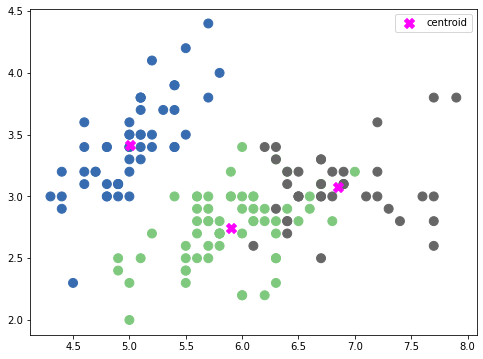

In [177]:
#plotting data points on first two features as we only have a 2D space

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(iris_cluster_df.SepalLengthCm,iris_cluster_df.SepalWidthCm
            ,c=iris_cluster_df.cluster_label,cmap='Accent',s=80)

#plotting another axis for cluster center (centroids) for each cluster
ax.scatter(c_model.cluster_centers_[:,0],c_model.cluster_centers_[:,1],
            c='magenta',marker='X',s=100,label='centroid')

plt.legend()

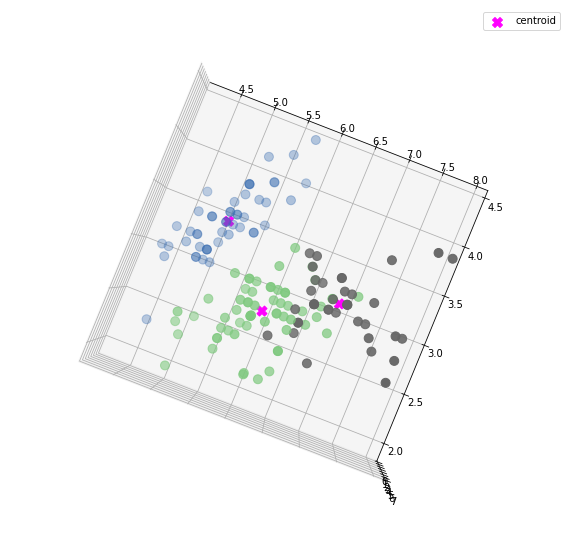

In [181]:
#plotting data points on first three features to try a 3d view

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris_cluster_df.SepalLengthCm,iris_cluster_df.SepalWidthCm,iris_cluster_df.PetalLengthCm
            ,c=iris_cluster_df.cluster_label,cmap='Accent',s=80)

ax.scatter(c_model.cluster_centers_[:,0],c_model.cluster_centers_[:,1],
            c='magenta',marker='X',s=100,label='centroid')

#this can be adjusted to change the view of the 3D plane
ax.view_init(90,-70)

plt.legend()
